### <center> 8. Проверка знаний

 А теперь проверим полученные знания на практике. 

Для выполнения практических заданий нам понадобится новый датасет heart

Датасет болезней сердца heart содержит информацию о пациентах и переменную предсказания 
target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

- age — возраст
- sex — пол (1 - мужчина, 0 - женщина)
- cp — тип боли в груди (4 значения)
- trestbps — артериальное давление в покое
- chol — холестерин сыворотки в мг/дл
- fbs — уровень сахара в крови натощак > 120 мг/дл
- restecg — результаты электрокардиографии в покое (значения 0,1,2)
- thalach — достигнута максимальная частота сердечных сокращений
- exang — стенокардия, вызванная физической нагрузкой
- oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope — наклон пикового сегмента ST при нагрузке
- ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
- thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

import dtale
import sweetviz as sv
from ydata_profiling import ProfileReport

In [2]:
heart = pd.read_csv('data/heart.zip')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Задание 8.1
1 point possible (graded)
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

79

In [4]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [5]:
heart['old'].sum()

79

### Задание 8.2
1 point possible (graded)

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. 
trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

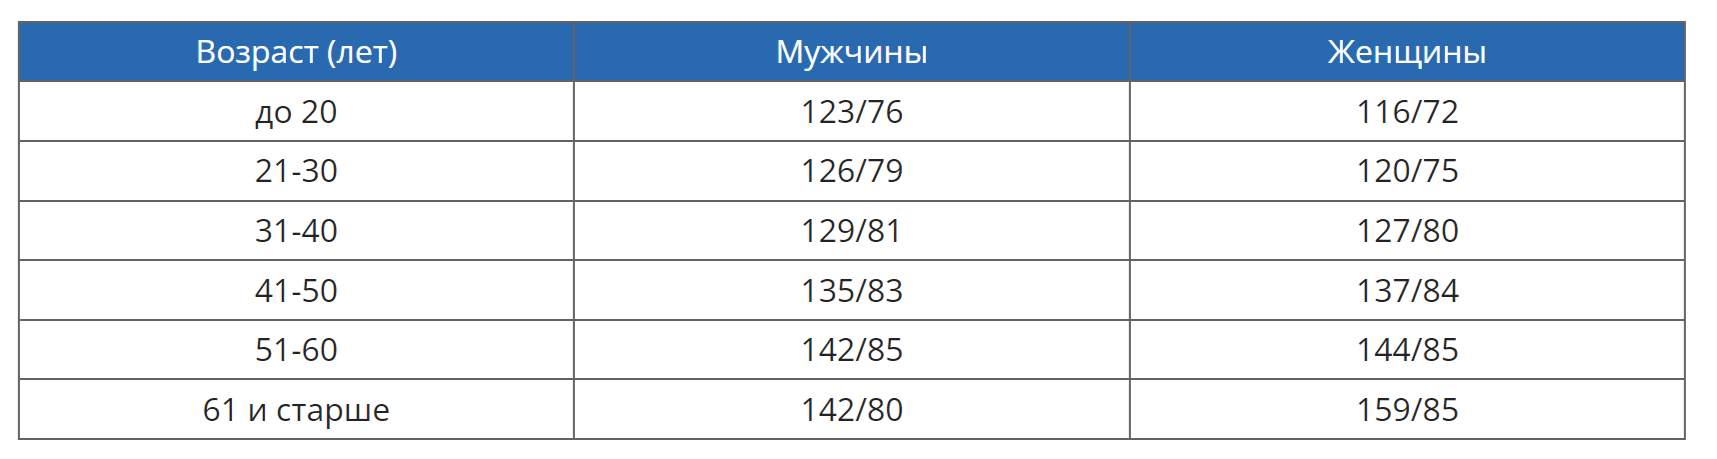

Ответ:
142

In [6]:
def get_trestbps(row):
    if row['sex'] == 1:
        if row['age'] <= 20:
            return  '123'
        elif row['age'] > 20 and row['age'] <= 30:
            return  '126'
        elif row['age'] > 30 and row['age'] <= 40:
            return  '129'
        elif row['age'] > 40 and row['age'] <= 50:
            return  '135'
        elif row['age'] > 50 and row['age'] <= 60:
            return  '142'
        return  '142'
    else:
        if row['age'] <= 20:
            return  '116'
        elif row['age'] > 20 and row['age'] <= 30:
            return  '120'
        elif row['age'] > 30 and row['age'] <= 40:
            return  '127'
        elif row['age'] > 40 and row['age'] <= 50:
            return  '137'
        elif row['age'] > 50 and row['age'] <= 60:
            return  '144'
        return  '159'
        
heart['trestbps_mean'] = heart[['sex','age']].apply(get_trestbps, axis=1)
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


Данный код выполняет следующие действия:

Определяется функция get_trestbps, которая принимает строку (запись) из датафрейма heart в качестве аргумента.

Внутри функции проверяется значение пола пациента (row['sex']). Если пол равен 1 (мужчина), то выполняются условия для мужчин, иначе (пол не равен 1, то есть женщина) выполняются условия для женщин.

В каждом условии проверяется возраст пациента (row['age']) и возвращается соответствующее значение систолического давления в формате "верхнее/нижнее значение" (например, "123/76").

После определения функции get_trestbps, она применяется к столбцам 'sex' и 'age' датафрейма heart с помощью метода apply и параметра axis=1. Это означает, что функция будет применяться построчно (для каждой записи) вдоль оси 1 (горизонтальная ось).

Результат применения функции get_trestbps для каждой строки записывается в новый столбец 'trestbps_mean' датафрейма heart.

In [7]:
heart.loc[300, 'trestbps_mean']

'142'

Задание 8.3
1 point possible (graded)
Проанализируйте датасет и выберите категориальные признаки.


            - age — возраст
- sex — пол (1 - мужчина, 0 - женщина)
- cp — тип боли в груди (4 значения)
            - trestbps — артериальное давление в покое
            - chol — холестерин сыворотки в мг/дл
- fbs — уровень сахара в крови натощак > 120 мг/дл
- restecg — результаты электрокардиографии в покое (значения 0,1,2)
            - thalach — достигнута максимальная частота сердечных сокращений
- exang — стенокардия, вызванная физической нагрузкой
            - oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope — наклон пикового сегмента ST при нагрузке
- ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
- thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект
- old
- trestbps_mean

- target


In [8]:
heart.nunique()

age               41
sex                2
cp                 4
trestbps          49
chol             152
fbs                2
restecg            3
thalach           91
exang              2
oldpeak           40
slope              3
ca                 5
thal               4
target             2
old                2
trestbps_mean      8
dtype: int64

### Задание 8.4
1 point possible (graded)

Вышеперечисленные категориальные признаки уже представлены в числовом виде. Проанализируйте их и назовите те, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding).

Учтите, что дополнительные методы кодирования требуются только для категориальных признаков с более чем двумя категориями. Бинарные признаки (принимающие два значения, такие как 0 и 1) не нуждаются в дополнительном кодировании.



        sex                2
cp                 4


        fbs                2
restecg            3

        exang              2
slope              3

ca                 5
thal               4

        old                2
trestbps_mean      8

        target             2

### Задание 8.5
1 point possible (graded)

Закодируйте вышеперечисленные признаки методом OneHotEncoding, удалив исходные признаки.
cp, restecg, slope, ca, thal, trestbps_mean
Сколько признаков получилось в датасете?

Ответ
30

In [ ]:
import category_encoders as ce

#cols_to_encode = ['cp', 'restecg', 'slope', 'ca', 'thal']

    
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart_encoded = pd.concat([heart, type_bin], axis=1)
heart_encoded_clean = heart_encoded.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)
#heart_encoded_clean

heart_encoded_clean.info()
display(heart_encoded_clean.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    object 
 11  cp_1           303 non-null    int64  
 12  cp_2           303 non-null    int64  
 13  cp_3           303 non-null    int64  
 14  cp_4           303 non-null    int64  
 15  restecg_1      303 non-null    int64  
 16  restecg_2      303 non-null    int64  
 17  restecg_3      303 non-null    int64  
 18  slope_1   

30

In [ ]:
#display(heart_encoded.shape[1] - heart.shape[1])


### Задание 8.6
1 point possible (graded)

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

'age',
'trestbps',
'chol',
'thalach',
'oldpeak'


Ответ:
0.816232


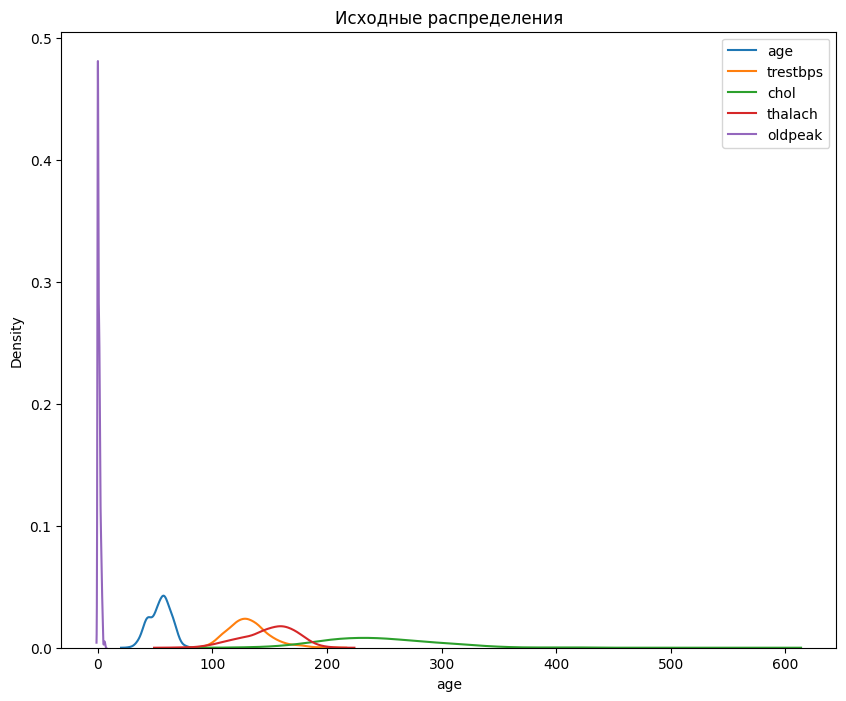

In [13]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')
# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart_encoded_clean['age'], ax=ax1, label ='age')
sns.kdeplot(heart_encoded_clean['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart_encoded_clean['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart_encoded_clean['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart_encoded_clean['oldpeak'], ax=ax1, label ='oldpeak')
plt.legend()


In [19]:
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_encoded_clean[selected_columns].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Давайте проанализируем каждый столбец и выберем подходящий способ нормализации:

age: Распределение довольно равномерное (mean≈median), без экстремальных выбросов. Подойдет MinMaxScaler.

trestbps: Есть небольшая асимметрия (max=200 сильно отстоит), лучше использовать RobustScaler для устойчивости к выбросам.

chol: Заметны сильные выбросы (max=564 при 75% квартиле=274.5). Однозначно RobustScaler.

thalach: Распределение относительно симметричное, без сильных выбросов. Подойдет MinMaxScaler.

oldpeak: Асимметричное распределение с выбросами (max=6.2 при медиане=0.8). Лучше RobustScaler.

In [22]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Create a copy to avoid modifying the original DataFrame
heart_scaled = heart_encoded_clean.copy()

# Features for MinMaxScaler
minmax_features = ['age', 'thalach']
minmax_scaler = MinMaxScaler()
heart_scaled[minmax_features] = minmax_scaler.fit_transform(heart_encoded_clean[minmax_features])

# Features for RobustScaler
robust_features = ['trestbps', 'chol', 'oldpeak']
robust_scaler = RobustScaler()
heart_scaled[robust_features] = robust_scaler.fit_transform(heart_scaled[robust_features])


display(round(heart_scaled['chol'].std(),6))

0.816232

### Задание 8.7
1 point possible (graded)

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.


age-old 0.7180284360485262

age-trestbps_mean 0.7630547732487207

thal_2-thal_3 -0.8730321138511459

restecg_1-restecg_2 -0.973934361546568

slope_2-slope_3 -0.8703650629236364



<Axes: >

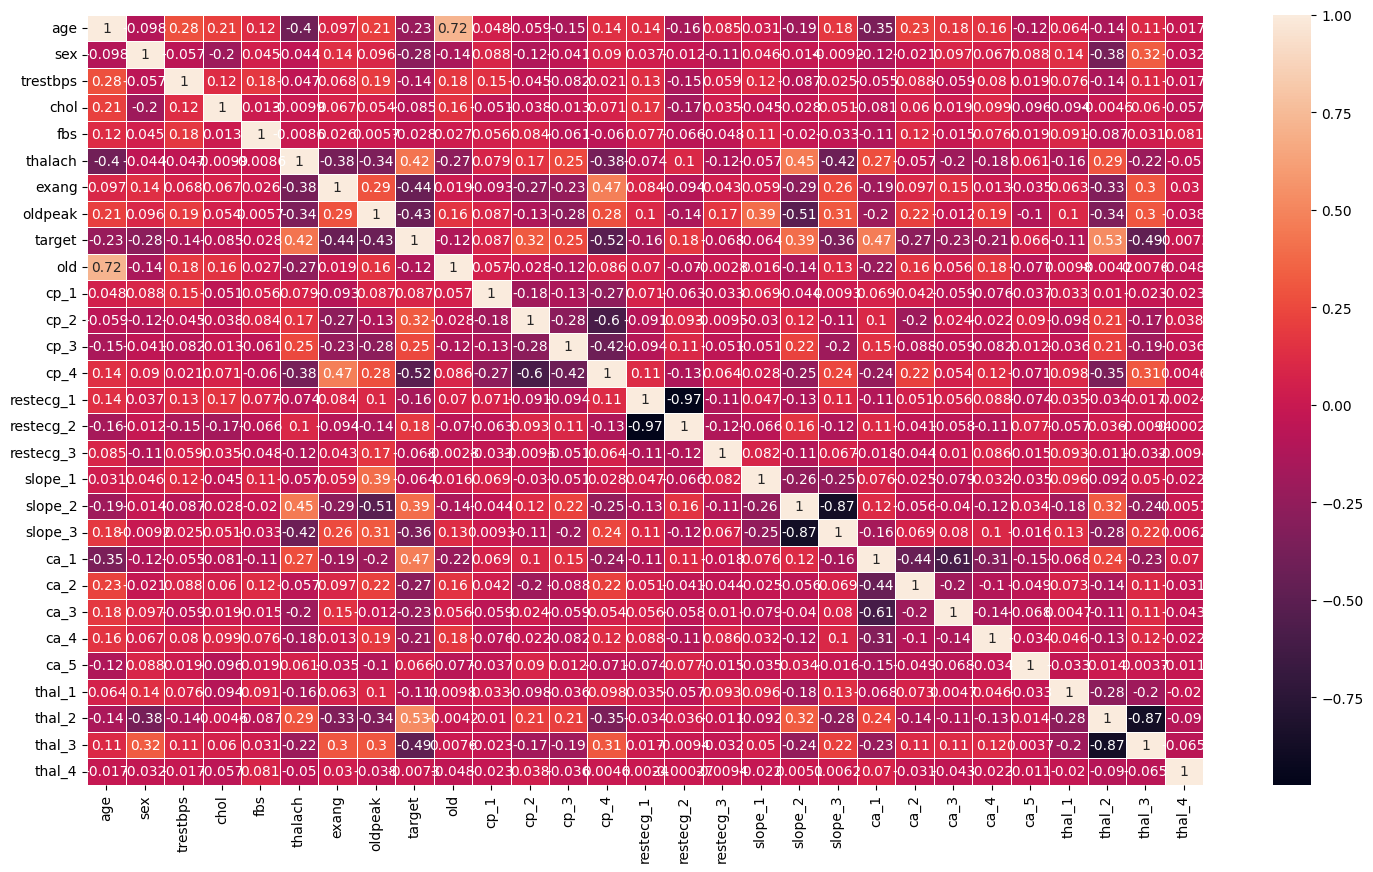

In [24]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(heart_scaled.corr(method = 'pearson', numeric_only = True), annot=True, linewidths=.5, ax=ax)

In [40]:
print('age-old', heart_scaled['age'].corr(heart_scaled['old']))
print('age-trestbps_mean', heart_scaled['age'].corr(heart_scaled['trestbps_mean']))
print('slope_1-slope_3', heart_scaled['slope_1'].corr(heart_scaled['slope_3']))
print('thal_1-thal_2', heart_scaled['thal_1'].corr(heart_scaled['thal_2']))
print('thal_3-thal_4', heart_scaled['thal_3'].corr(heart_scaled['thal_4']))
print('cp_1-ca_1', heart_scaled['cp_1'].corr(heart_scaled['ca_1']))
print('cp_1-cp_2', heart_scaled['cp_1'].corr(heart_scaled['cp_2']))
print('thal_2-thal_3', heart_scaled['thal_2'].corr(heart_scaled['thal_3']))
print('restecg_1-restecg_2', heart_scaled['restecg_1'].corr(heart_scaled['restecg_2']))
print('slope_2-slope_3', heart_scaled['slope_2'].corr(heart_scaled['slope_3']))
print('age-exang', heart_scaled['age'].corr(heart_scaled['exang']))
print('age-chol', heart_scaled['age'].corr(heart_scaled['chol']))

age-old 0.7180284360485262
age-trestbps_mean 0.7630547732487207
slope_1-slope_3 -0.2529037731950229
thal_1-thal_2 -0.2766352908319754
thal_3-thal_4 -0.06464995230202877
cp_1-ca_1 0.0685224515340874
cp_1-cp_2 -0.1818936982424556
thal_2-thal_3 -0.8730321138511459
restecg_1-restecg_2 -0.973934361546568
slope_2-slope_3 -0.8703650629236364
age-exang 0.09680082645526779
age-chol 0.21367795655956184
